### 3

In [1]:
import numpy as np

"""
To import functions of textbook from `fnc.py`, 
we need to add the path of `fnc.py` to the system path
"""
import sys
sys.path.append('../')
from fnc import forwardsub, backsub

# (a)
L = np.array([
    [-2, 0, 0], 
    [1, -1, 0], 
    [3, 2, 1]
])
b = np.array([-4, 2, 1])

x = forwardsub(L, b)
print("x = ", x)

x =  [ 2. -0. -5.]


In [2]:
# (b)
L = np.array([
    [4, 0, 0, 0], 
    [1, -2, 0, 0], 
    [-1, 4, 4, 0], 
    [2, -5, 5, 1]
])
b = np.array([-4, 1, -3, 5])

x = forwardsub(L, b)
print("x = ", x)

x =  [-1. -1.  0.  2.]


In [3]:
# (c)
U = np.array([
    [3, 2, 1], 
    [0, 1, -1], 
    [0, 0, 2]
])
b = np.array([1, 2, -4])

x = backsub(U, b)
print("x = ", x)

x =  [ 1.  0. -2.]


### 4

In [4]:
import numpy as np

"""
To import functions of textbook from `fnc.py`, 
we need to add the path of `fnc.py` to the system path
"""
import sys
sys.path.append('../')
from fnc import forwardsub, backsub

# (a)
U = np.array([
    [3, 1, 0], 
    [0, -1, -2], 
    [0, 0, 3]
])
b = np.array([1, 1, 6])

x = backsub(U, b)

print("x = ", x)
print("b - Ux = ", b - U @ x)

x =  [ 2. -5.  2.]
b - Ux =  [0. 0. 0.]


In [5]:
U = np.array([
    [3, 1, 0, 6], 
    [0, -1, -2, 7], 
    [0, 0, 3, 4], 
    [0, 0, 0, 5]
])
b = np.array([4, 1, 1, 5])

x = backsub(U, b)

print("x = ", x)
print("b - Ux = ", b - U @ x)

x =  [-3.33333333  8.         -1.          1.        ]
b - Ux =  [0. 0. 0. 0.]


### 5

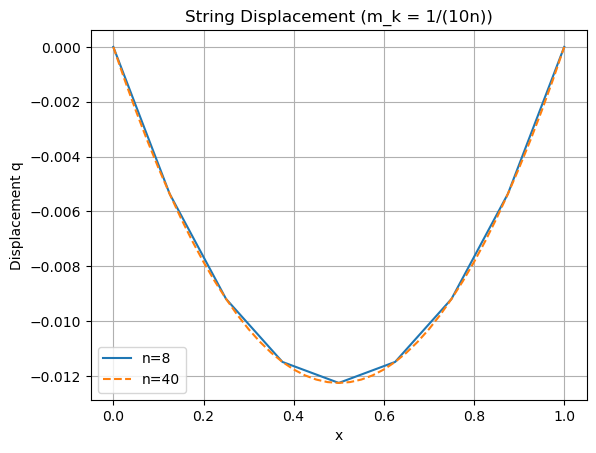

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def solve_displacement(n):
    size = n - 1
    g, tau = -9.8, 10
    m_k = 1 / (10 * n)

    A = (  # tridiagonal matrix
        np.diag(2 * np.ones(size), 0) +
        np.diag(-1 * np.ones(size-1), 1) +
        np.diag(-1 * np.ones(size-1), -1)
    )
    f = (m_k * g) / (n * tau) * np.ones(size)

    q = np.linalg.solve(A, f)
    x = np.linspace(0, 1, n + 1)
    return x, np.concatenate(([0], q, [0]))

# solve for n=8 and n=40
x_n8, q_n8 = solve_displacement(8)
x_n40, q_n40 = solve_displacement(40)

# Plot
plt.plot(x_n8, q_n8, label='n=8')
plt.plot(x_n40, q_n40, '--', label='n=40')
plt.xlabel('x'), plt.ylabel('Displacement q')
plt.title('String Displacement (m_k = 1/(10n))')
plt.legend()
plt.grid()
plt.show()

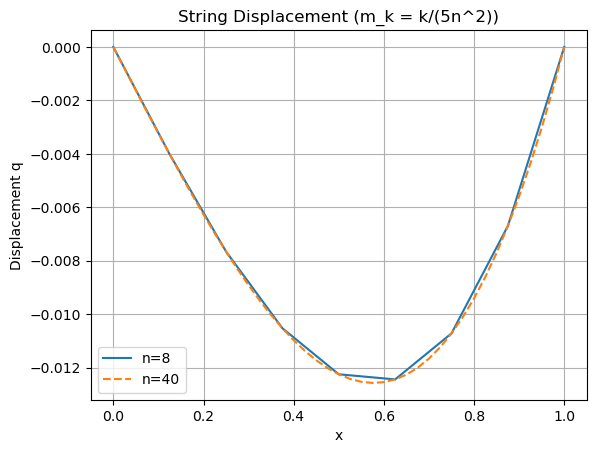

In [7]:
def solve_displacement_2(n):
    size = n - 1
    g, tau = -9.8, 10
    m_k = np.linspace(1, n-1, n-1) / (5 * n**2)

    A = (  # tridiagnal matrix
        np.diag(2 * np.ones(size), 0) +
        np.diag(-1 * np.ones(size-1), 1) +
        np.diag(-1 * np.ones(size-1), -1)
    )
    f = (m_k * g) / (n * tau) * np.ones(size)

    q = np.linalg.solve(A, f)
    x = np.linspace(0, 1, n + 1)
    return x, np.concatenate(([0], q, [0]))

# Solve and plot
x_n8, q_n8 = solve_displacement_2(8)
x_n40, q_n40 = solve_displacement_2(40)

plt.plot(x_n8, q_n8, label='n=8')
plt.plot(x_n40, q_n40, '--', label='n=40')
plt.xlabel('x'), plt.ylabel('Displacement q')
plt.title('String Displacement (m_k = k/(5n^2))')
plt.legend()
plt.grid()
plt.show()

### 6

In [8]:
import numpy as np
"""
To import functions of textbook from `fnc.py`, 
we need to add the path of `fnc.py` to the system path
"""
import sys
sys.path.append('../')
from fnc import forwardsub, backsub

# (a)
def modified_forwardsub(L, B):
    n, p = B.shape  # for (n x b) matrix B
    X = np.zeros((n, p))

    # for each column of B, solve the system Lx = b
    for j in range(p):
        b = B[:, j]
        X[:, j] = forwardsub(L, b)
    return X

L = np.array([
    [-2, 0, 0], 
    [1, -1, 0], 
    [3, 2, 1]
])
b = np.array([-4, 2, 1])
B = b.reshape(-1, 1).repeat(3, axis=1)

X = modified_forwardsub(L, B)
print("X = \n", X)

X = 
 [[ 2.  2.  2.]
 [-0. -0. -0.]
 [-5. -5. -5.]]


In [9]:
def modified_backsub(U, B):
    n, p = B.shape
    X = np.zeros((n, p))

    # for each column of B, solve the system Ux = b
    for j in range(p):
        b = B[:, j]
        X[:, j] = backsub(U, b)
    return X

U = np.array([
    [3, 2, 1], 
    [0, 1, -1], 
    [0, 0, 2]
])
b = np.array([1, 2, -4])
B = b.reshape(-1, 1).repeat(3, axis=1)

X = modified_backsub(U, B)
print("X = \n", X)

X = 
 [[ 1.  1.  1.]
 [ 0.  0.  0.]
 [-2. -2. -2.]]


In [ ]:
# (b)
def ltinverse(L):
    """
    Compute the inverse of a lower triangular matrix `L` 
    using the modified forwardsub function.
    """
    n = L.shape[0]
    I = np.eye(n)
    return modified_forwardsub(L, I)

In [11]:
L_1 = np.array([
    [1, 0, 0], 
    [2, 1, 0], 
    [3, 4, 1]
])

L_1_inv = ltinverse(L_1)
print("L_1^{-1} = \n", L_1_inv)
print("check \nL_1 @ L_1^{-1} = \n", L_1 @ L_1_inv)

L_1^{-1} = 
 [[ 1.  0.  0.]
 [-2.  1.  0.]
 [ 5. -4.  1.]]
check 
L_1 @ L_1^{-1} = 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [12]:
L_2 = np.tril(np.random.rand(5, 5))

L_2_inv = ltinverse(L_2)
print("L_2^{-1} = \n", L_2_inv)
print("check \nL_2 @ L_2^{-1} = \n", L_2 @ L_2_inv)

L_2^{-1} = 
 [[ 3.90256385  0.          0.          0.          0.        ]
 [-5.00567399  1.28683772  0.          0.          0.        ]
 [ 2.36629496 -1.84955394  1.67951865  0.          0.        ]
 [-1.17398603  1.75442951 -3.50542893  2.1642124   0.        ]
 [-0.31060314 -1.78393257  3.51174106 -2.55876756  1.18608433]]
check 
L_2 @ L_2^{-1} = 
 [[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


### 7

In [13]:
import numpy as np
"""
To import functions of textbook from `fnc.py`, 
we need to add the path of `fnc.py` to the system path
"""
import sys
sys.path.append('../')
from fnc import backsub

# demo 2.3.6
alpha = 0.3
beta = 2.2
U = np.diag(np.ones(5)) + np.diag(-1 * np.ones(4), 1)
U[0, [3, 4]] = [alpha - beta, beta]
print("U = \n", U)

U = 
 [[ 1.  -1.   0.  -1.9  2.2]
 [ 0.   1.  -1.   0.   0. ]
 [ 0.   0.   1.  -1.   0. ]
 [ 0.   0.   0.   1.  -1. ]
 [ 0.   0.   0.   0.   1. ]]


In [14]:
x_exact = np.ones(5)
b = np.array([alpha, 0, 0, 0, 1])
print("x_exact = ", x_exact)
print("b = ", b)

x_exact =  [1. 1. 1. 1. 1.]
b =  [0.3 0.  0.  0.  1. ]


In [15]:
x = backsub(U, b)
error = x - x_exact
print("error: ", error)

error:  [2.22044605e-16 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]


In [16]:
# \alpha = 0.1, \beta = 10, 100, 10^3, ..., 10^{12}
alpha = 0.1
beta_list = [10 ** i for i in range(1, 13)]
result_list = []
for beta in beta_list:
    A = np.diag(np.ones(5)) + np.diag(-1 * np.ones(4), 1)
    A[0, [3, 4]] = [alpha - beta, beta]

    b = np.array([alpha, 0, 0, 0, 1])

    x = backsub(A, b)
    result_list.append((beta, np.abs(x[0] - 1)))

print("beta\t\t|x1 - 1|")
for beta, error in result_list:
    print(f"{beta:e}\t{error}")

beta		|x1 - 1|
1.000000e+01	4.440892098500626e-16
1.000000e+02	5.773159728050814e-15
1.000000e+03	2.275957200481571e-14
1.000000e+04	3.638200851696638e-13
1.000000e+05	5.820788295807233e-12
1.000000e+06	2.3283153183228933e-11
1.000000e+07	3.725291186640334e-10
1.000000e+08	5.9604645663569045e-09
1.000000e+09	2.384185793236071e-08
1.000000e+10	3.8146972658470446e-07
1.000000e+11	6.1035156250222045e-06
1.000000e+12	2.4414062500088818e-05
